# Walmart sales data analysis

## Aim

To predict aggregate monthly sales using Regression models over Walmart dataset.

## Objectives
- Getting familiar with data analysis techniques
- Learning about prediction models/algoithms through experimentation
- Integrating a python backend to a compatible explorative GUI

## Methodology

- Step 0: Environment Setup
- Step 1: Preparing and reading data
- Step 2: Testing different prediction algorithms

In [1]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd  
import seaborn as sns
from calendar import month_name

## Loading Data into dataframes

In [2]:
train = pd.read_csv("./data/train.csv")
#test = pd.read_csv("./data/test.csv")
stores = pd.read_csv("./data/stores.csv")
features = pd.read_csv("./data/features.csv")

## Preliminary Analysis

In [3]:
# finding length
print(len(features))

# finding dimentionality
features.shape

8190


(8190, 12)

**Total rows are 8190.**

**There are twelve columns.**

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


- Date is recognised as an "Object" by pandas.
- It means that it is not recognised as any pre-defined Python type

## Optimising given data

In [11]:
for i in range(1, 6):
    features[f"MarkDown{i}"] = features[f"MarkDown{i}"].fillna(0)
# CPI and Unemployment will be substituted by mean
features["Unemployment"] = features["Unemployment"].fillna(np.mean(features["Unemployment"]))
features["CPI"] = features["CPI"].fillna(np.mean(features["CPI"]))

#knn_impute(target=features[''], attributes=df.drop(['Age', 'PassengerId'], 1),
#                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
#                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)

In [12]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [13]:
print(len(pd.unique(features["Store"])))

45


In [14]:
print(len(pd.unique(train["IsHoliday"])))

2


In [15]:
main = train.merge(stores, on = "Store", how="left")
main = main.merge(features, on = ["Store", "Date"], how = "left")

main = main.sort_values(by=["Date"])

main["Date"] = pd.to_datetime(main["Date"])
main["Month"] = main["Date"].dt.month
main["Year"] = main["Date"].dt.year

main = main.sort_values(by=["Month", "Year"])


In [16]:
main.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month,Year
166685,17,93,2011-01-07,6283.00,False,B,93188,6.23,2.891,0.0,0.0,0.0,0.0,0.0,127.191774,6.866,False,1,2011
110094,12,17,2011-01-07,10006.77,False,B,112238,37.64,3.287,0.0,0.0,0.0,0.0,0.0,127.191774,14.021,False,1,2011
23791,3,25,2011-01-07,2658.57,False,B,37392,53.35,2.976,0.0,0.0,0.0,0.0,0.0,214.695510,7.551,False,1,2011
391108,42,1,2011-01-07,8836.00,False,C,39690,43.43,3.287,0.0,0.0,0.0,0.0,0.0,127.191774,8.744,False,1,2011
248093,26,9,2011-01-07,9526.27,False,A,152513,21.13,3.193,0.0,0.0,0.0,0.0,0.0,132.882323,7.907,False,1,2011


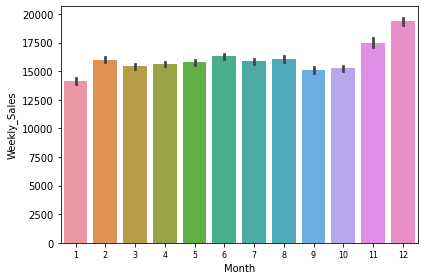

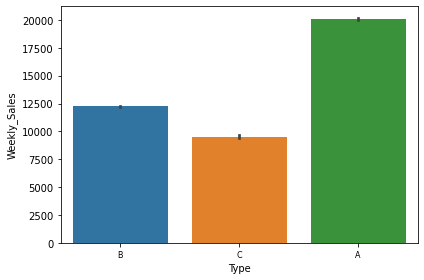

In [17]:
bar_plot = sns.barplot(x="Month", y="Weekly_Sales",  data=main)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

bar_plot = sns.barplot(x="Type", y="Weekly_Sales",  data=main)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

In [18]:
len(main)

421570

In [19]:
# IsHoliday_x and IsHoliday_y are duplicates
main["IsHoliday"] = main["IsHoliday_y"]
main = main.drop(labels=["IsHoliday_y", "IsHoliday_x"], axis = 'columns')

# dropping MarkDown4
main = main.drop(labels=["MarkDown4"], axis = 'columns')

# Combining other MarkDowns into one
main["MarkDown"] = main["MarkDown1"] + main["MarkDown2"] + main["MarkDown3"] + main["MarkDown5"]
main = main.drop(labels=["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown5"], axis = 'columns')